In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Parameters
S0 = 10  # initial stock price (at-the-money)
K_ITM_put = 8  # in-the-money for put
K_OTM_put = 12   # out-of-the-money for put
K_ATM_put = 10      # at-the-money strike

K_ITM_call = 12  # in-the-money for call
K_OTM_call = 8   # out-of-the-money for call
K_ATM_call = 10  # at-the-money strike

rf_rate = 0.07  # risk-free rate
volatility = 0.7  # annual volatility
T_days = 63     # days to maturity (3 months)
trading_days_per_year = 252  # total trading days in a year

# Time to maturity
time_to_maturity = np.linspace(1 / trading_days_per_year, T_days / trading_days_per_year, T_days)

# Black-Scholes Greeks
def black_scholes_greeks(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        delta = norm.cdf(d1)
    else:  # put option
        delta = norm.cdf(d1) - 1
    

    gamma = ((1/np.sqrt(2*np.pi)) * np.exp(-0.5* d1 ** 2)) / (S * sigma * np.sqrt(T))
    vega = ((1/np.sqrt(2*np.pi)) * np.exp(-0.5* d1 ** 2)) * S * np.sqrt(T)

    theta = - (S * ((1/np.sqrt(2*np.pi)) * np.exp(-0.5* d1 ** 2)) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2 if option_type == "call" else -d2)
    
    return delta, gamma, vega, theta


# Arrays to store Greeks for each option type and moneyness
greeks_results = {"ITM_put": {"delta": [], "gamma": [], "vega": [], "theta": []},
                  "ATM_put": {"delta": [], "gamma": [], "vega": [], "theta": []},
                  "OTM_put": {"delta": [], "gamma": [], "vega": [], "theta": []},
                  "ITM_call": {"delta": [], "gamma": [], "vega": [], "theta": []},
                  "ATM_call": {"delta": [], "gamma": [], "vega": [], "theta": []},
                  "OTM_call": {"delta": [], "gamma": [], "vega": [], "theta": []}}

In [3]:
# Calculate Greeks daily over the period for each moneyness
for T in time_to_maturity:
    # ITM Put (Strike = 8)
    delta, gamma, vega, theta = black_scholes_greeks(S0, K_ITM_put, T, rf_rate, volatility, "put")
    greeks_results["ITM_put"]["delta"].append(delta)
    greeks_results["ITM_put"]["gamma"].append(gamma)
    greeks_results["ITM_put"]["vega"].append(vega)
    greeks_results["ITM_put"]["theta"].append(theta)
    
    # ATM Put (Strike = 10, Call example)
    delta, gamma, vega, theta = black_scholes_greeks(S0, K_ATM_put, T, rf_rate, volatility, "put")
    greeks_results["ATM_put"]["delta"].append(delta)
    greeks_results["ATM_put"]["gamma"].append(gamma)
    greeks_results["ATM_put"]["vega"].append(vega)
    greeks_results["ATM_put"]["theta"].append(theta)
    
    # OTM Put (Strike = 12)
    delta, gamma, vega, theta = black_scholes_greeks(S0, K_OTM_put, T, rf_rate, volatility, "put")
    greeks_results["OTM_put"]["delta"].append(delta)
    greeks_results["OTM_put"]["gamma"].append(gamma)
    greeks_results["OTM_put"]["vega"].append(vega)
    greeks_results["OTM_put"]["theta"].append(theta)

    # ITM Call (Strike = 12)
    delta, gamma, vega, theta = black_scholes_greeks(S0, K_ITM_call, T, rf_rate, volatility, "call")
    greeks_results["ITM_call"]["delta"].append(delta)
    greeks_results["ITM_call"]["gamma"].append(gamma)
    greeks_results["ITM_call"]["vega"].append(vega)
    greeks_results["ITM_call"]["theta"].append(theta)
    
    # ATM Call (Strike = 10, Call example)
    delta, gamma, vega, theta = black_scholes_greeks(S0, K_ATM_call, T, rf_rate, volatility, "call")
    greeks_results["ATM_call"]["delta"].append(delta)
    greeks_results["ATM_call"]["gamma"].append(gamma)
    greeks_results["ATM_call"]["vega"].append(vega)
    greeks_results["ATM_call"]["theta"].append(theta)
    
    # OTM Call (Strike = 8)
    delta, gamma, vega, theta = black_scholes_greeks(S0, K_OTM_call, T, rf_rate, volatility, "call")
    greeks_results["OTM_call"]["delta"].append(delta)
    greeks_results["OTM_call"]["gamma"].append(gamma)
    greeks_results["OTM_call"]["vega"].append(vega)
    greeks_results["OTM_call"]["theta"].append(theta)

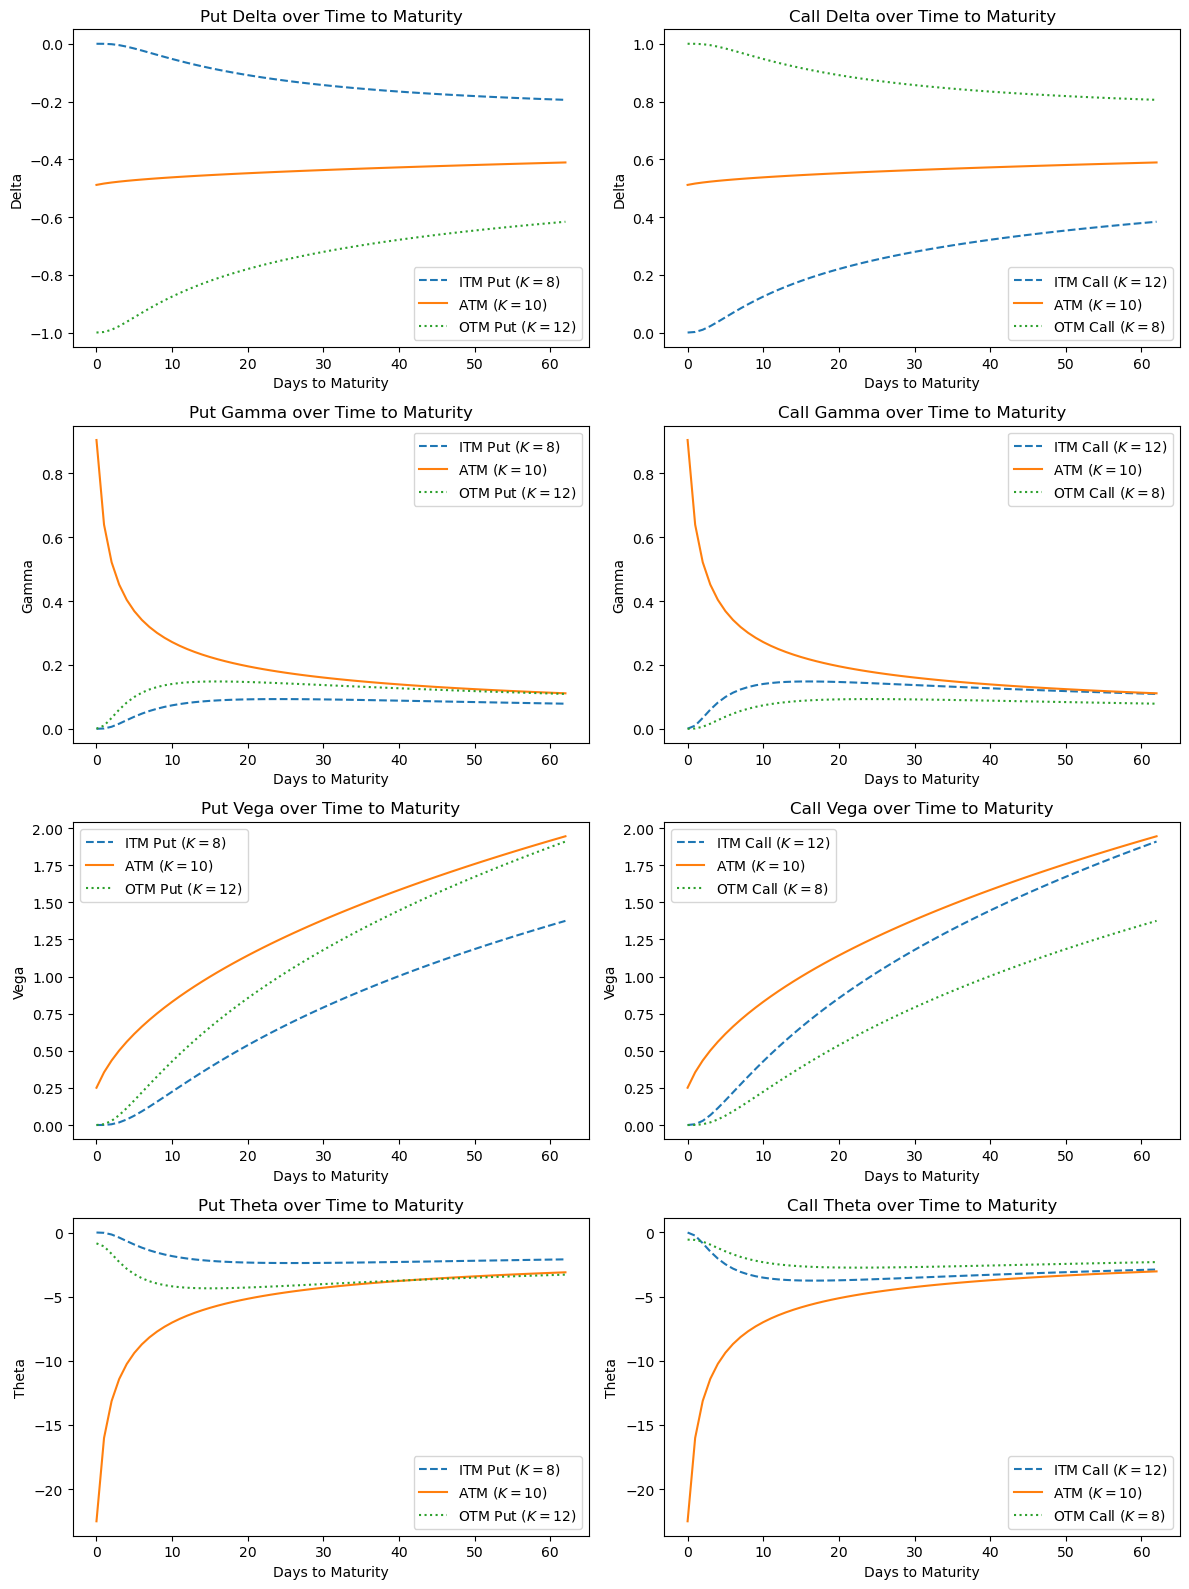

In [4]:
# Plotting the Greeks
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
x_axis = np.arange(T_days)

# Plot Put Delta
axs[0,0].plot(x_axis, greeks_results["ITM_put"]["delta"], label="ITM Put ($K=8$)", linestyle="--")
axs[0,0].plot(x_axis, greeks_results["ATM_put"]["delta"], label="ATM ($K=10$)")
axs[0,0].plot(x_axis, greeks_results["OTM_put"]["delta"], label="OTM Put ($K=12$)", linestyle=":")
axs[0,0].set_title("Put Delta over Time to Maturity")
axs[0,0].set_xlabel("Days to Maturity")
axs[0,0].set_ylabel("Delta")
axs[0,0].legend()

# Plot Call Delta
axs[0,1].plot(x_axis, greeks_results["ITM_call"]["delta"], label="ITM Call ($K=12$)", linestyle="--")
axs[0,1].plot(x_axis, greeks_results["ATM_call"]["delta"], label="ATM ($K=10$)")
axs[0,1].plot(x_axis, greeks_results["OTM_call"]["delta"], label="OTM Call ($K=8$)", linestyle=":")
axs[0,1].set_title("Call Delta over Time to Maturity")
axs[0,1].set_xlabel("Days to Maturity")
axs[0,1].set_ylabel("Delta")
axs[0,1].legend()

# Plot Put Gamma
axs[1,0].plot(x_axis, greeks_results["ITM_put"]["gamma"], label="ITM Put ($K=8$)", linestyle="--")
axs[1,0].plot(x_axis, greeks_results["ATM_put"]["gamma"], label="ATM ($K=10$)")
axs[1,0].plot(x_axis, greeks_results["OTM_put"]["gamma"], label="OTM Put ($K=12$)", linestyle=":")
axs[1,0].set_title("Put Gamma over Time to Maturity")
axs[1,0].set_xlabel("Days to Maturity")
axs[1,0].set_ylabel("Gamma")
axs[1,0].legend()

# Plot Call Gamma
axs[1,1].plot(x_axis, greeks_results["ITM_call"]["gamma"], label="ITM Call ($K=12$)", linestyle="--")
axs[1,1].plot(x_axis, greeks_results["ATM_call"]["gamma"], label="ATM ($K=10$)")
axs[1,1].plot(x_axis, greeks_results["OTM_call"]["gamma"], label="OTM Call ($K=8$)", linestyle=":")
axs[1,1].set_title("Call Gamma over Time to Maturity")
axs[1,1].set_xlabel("Days to Maturity")
axs[1,1].set_ylabel("Gamma")
axs[1,1].legend()

# Plot Put Vega
axs[2,0].plot(x_axis, greeks_results["ITM_put"]["vega"], label="ITM Put ($K=8$)", linestyle="--")
axs[2,0].plot(x_axis, greeks_results["ATM_put"]["vega"], label="ATM ($K=10$)")
axs[2,0].plot(x_axis, greeks_results["OTM_put"]["vega"], label="OTM Put ($K=12$)", linestyle=":")
axs[2,0].set_title("Put Vega over Time to Maturity")
axs[2,0].set_xlabel("Days to Maturity")
axs[2,0].set_ylabel("Vega")
axs[2,0].legend()

# Plot Call Vega
axs[2,1].plot(x_axis, greeks_results["ITM_call"]["vega"], label="ITM Call ($K=12$)", linestyle="--")
axs[2,1].plot(x_axis, greeks_results["ATM_call"]["vega"], label="ATM ($K=10$)")
axs[2,1].plot(x_axis, greeks_results["OTM_call"]["vega"], label="OTM Call ($K=8$)", linestyle=":")
axs[2,1].set_title("Call Vega over Time to Maturity")
axs[2,1].set_xlabel("Days to Maturity")
axs[2,1].set_ylabel("Vega")
axs[2,1].legend()

# Plot Put Theta
axs[3,0].plot(x_axis, greeks_results["ITM_put"]["theta"], label="ITM Put ($K=8$)", linestyle="--")
axs[3,0].plot(x_axis, greeks_results["ATM_put"]["theta"], label="ATM ($K=10$)")
axs[3,0].plot(x_axis, greeks_results["OTM_put"]["theta"], label="OTM Put ($K=12$)", linestyle=":")
axs[3,0].set_title("Put Theta over Time to Maturity")
axs[3,0].set_xlabel("Days to Maturity")
axs[3,0].set_ylabel("Theta")
axs[3,0].legend()

# Plot Call Theta
axs[3,1].plot(x_axis, greeks_results["ITM_call"]["theta"], label="ITM Call ($K=12$)", linestyle="--")
axs[3,1].plot(x_axis, greeks_results["ATM_call"]["theta"], label="ATM ($K=10$)")
axs[3,1].plot(x_axis, greeks_results["OTM_call"]["theta"], label="OTM Call ($K=8$)", linestyle=":")
axs[3,1].set_title("Call Theta over Time to Maturity")
axs[3,1].set_xlabel("Days to Maturity")
axs[3,1].set_ylabel("Theta")
axs[3,1].legend()

plt.tight_layout()
plt.show()

In [5]:
greeks_results

{'ITM_put': {'delta': [-1.8019914449496355e-07,
   -0.00014824560849568957,
   -0.0014854452633502602,
   -0.004842118417145325,
   -0.009996606172177125,
   -0.016366446099922105,
   -0.023424707524692945,
   -0.030790053783597338,
   -0.03820983783129517,
   -0.04552474118695082,
   -0.052638532101192625,
   -0.059496355778952736,
   -0.0660700757736572,
   -0.07234860927440334,
   -0.07833161055257609,
   -0.08402535344716588,
   -0.08944004933074012,
   -0.09458810248486926,
   -0.09948297956715346,
   -0.10413848295535844,
   -0.10856829065402773,
   -0.1127856725357177,
   -0.11680332326295817,
   -0.1206332722229525,
   -0.12428684396672662,
   -0.1277746513721998,
   -0.13110660957869447,
   -0.13429196265625087,
   -0.1373393176182478,
   -0.14025668218033815,
   -0.14305150388993537,
   -0.14573070908300578,
   -0.14830074069241594,
   -0.15076759431811726,
   -0.1531368522307459,
   -0.15541371515558755,
   -0.15760303179994217,
   -0.15970932616212985,
   -0.161736822707436